In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:
# A small function to compare predicted values with actual and count how many are correct

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [8]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')

# weights :  optional (default = ‘uniform’)
#weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian 

In [9]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [10]:
bc_df.shape

(569, 32)

In [11]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [12]:
bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bc_df.dtypes
bc_df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
bc_df.groupby(["diagnosis"]).count()

# Class distribution among B and M is almost 2:1. The model will better predict B and M

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


drop the first column from the data frame. This is Id column which is not used in modeling

In [14]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)

In [15]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [16]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

In [17]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = bc_df["diagnosis"]

In [18]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)

In [19]:
# store the bc_labels data into a separate np array

Y = np.array(bc_labels)

In [20]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [21]:
X_Test = X[401: , :]

In [22]:
# break the Y into training and test set labels
Y_Train = Y[:400, ]

In [23]:
Y_Test = Y[401:, ]

In [24]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [25]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [26]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [27]:
print(accuracy_score)

95.83333333333334


In [28]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


TypeError: can only concatenate str (not "float") to str

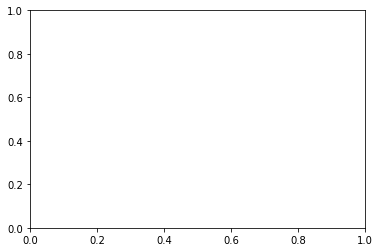

In [31]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(bc_df)

In [ ]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [ ]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['perimeter_mean', 'area_mean'], axis=1)

In [ ]:
X = np.array(bc_features_pruned_df_z)

In [ ]:
# Break the data into training and test set

X_Train = X[ :400, :]

In [ ]:
X_Test = X[401: , :]

In [ ]:
# Call Nearest Neighbour algorithm

NNH.fit(X_Train, Y_Train)

In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_Test)

In [ ]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(Y_Test, predicted_labels)

In [ ]:
print(accuracy_score)

In [ ]:
#cross tab